<a href="https://colab.research.google.com/github/mvungi113/Animal_info/blob/main/ZOO_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sun Mar 23 20:10:28 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   58C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [1]:
!pip install ultralytics
!pip install roboflow
!pip install opencv-python
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 115.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Import Required library
from ultralytics import YOLO
import torch
import cv2
import matplotlib.pyplot as plt
import os

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
print("Torch version", torch.__version__)
print("CUDA available", torch.cuda.is_available())

Torch version 2.6.0+cu124
CUDA available True


In [ ]:
%ls /content/drive/MyDrive/zoo_model/zoo_dataset
#check if data structure is correct

animal-detection-system-a7bbc-firebase-adminsdk-fbsvc-f0b4fb3231.json  runs/
data/                                                                  simba.avi
data.yaml                                                              test/
kasongo.avi                                                            train/
README.dataset.txt                                                     twiga.avi
README.roboflow.txt                                                    valid/


In [ ]:
#Train your model
#load YOLOV8
model = YOLO("yolov8n.pt")

#train model
model.train(
    data="/content/drive/MyDrive/zoo_model/zoo_dataset/data.yaml",
    epochs=50,
    batch=16,
    imgsz=640,
    name="train_zoo",
    device=0, #use GPU
)

100%|██████████| 6.25M/6.25M [00:00<00:00, 66.9MB/s]


Ultralytics 8.3.93 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/zoo_model/zoo_dataset/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train_zoo, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tru

100%|██████████| 755k/755k [00:00<00:00, 16.7MB/s]


Overriding model.yaml nc=80 with nc=14

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 95.0MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/zoo_model/zoo_dataset/train/labels.cache... 2195 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2195/2195 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/zoo_model/zoo_dataset/valid/labels.cache... 628 images, 0 backgrounds, 0 corrupt: 100%|██████████| 628/628 [00:00<?, ?it/s]


Plotting labels to runs/detect/train_zoo/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000556, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train_zoo
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.09G      1.249      3.296      1.502          6        640: 100%|██████████| 138/138 [01:49<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:04<00:00,  6.23s/it]


                   all        628       1083      0.549      0.383      0.399      0.254

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.57G      1.249      2.372      1.476          9        640: 100%|██████████| 138/138 [00:53<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.62it/s]


                   all        628       1083      0.665      0.461      0.495      0.303

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.57G      1.267       2.14      1.489          8        640: 100%|██████████| 138/138 [00:53<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.39it/s]


                   all        628       1083      0.665       0.52      0.544      0.337

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.57G      1.268      2.022      1.474         11        640: 100%|██████████| 138/138 [00:51<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:09<00:00,  2.16it/s]

                   all        628       1083      0.718      0.524      0.574      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.57G      1.259       1.84      1.454         18        640: 100%|██████████| 138/138 [00:51<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.46it/s]

                   all        628       1083      0.752      0.522      0.596      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.59G      1.241      1.697      1.445          7        640: 100%|██████████| 138/138 [00:51<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.59it/s]


                   all        628       1083      0.791       0.59      0.653      0.413

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.59G       1.21       1.61      1.432          9        640: 100%|██████████| 138/138 [00:51<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:09<00:00,  2.14it/s]

                   all        628       1083      0.817      0.615      0.679      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.59G      1.192       1.53      1.405          9        640: 100%|██████████| 138/138 [00:51<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.25it/s]

                   all        628       1083      0.824      0.621      0.692      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.59G      1.179      1.453      1.395         11        640: 100%|██████████| 138/138 [00:51<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.71it/s]

                   all        628       1083      0.744      0.616      0.678      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.59G      1.169      1.403       1.39         11        640: 100%|██████████| 138/138 [00:52<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:09<00:00,  2.21it/s]

                   all        628       1083      0.847      0.614      0.699      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.59G       1.15      1.352      1.373         13        640: 100%|██████████| 138/138 [00:50<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:09<00:00,  2.17it/s]

                   all        628       1083      0.773      0.625      0.706      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.59G      1.152      1.334      1.378          8        640: 100%|██████████| 138/138 [00:52<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.61it/s]

                   all        628       1083      0.783      0.587      0.683      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.59G      1.126      1.257      1.359          8        640: 100%|██████████| 138/138 [00:51<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.24it/s]

                   all        628       1083      0.787      0.651      0.719      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.59G      1.148      1.243      1.371          4        640: 100%|██████████| 138/138 [00:50<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.24it/s]


                   all        628       1083      0.757      0.657      0.722      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.59G      1.125      1.196      1.351          6        640: 100%|██████████| 138/138 [00:52<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.62it/s]

                   all        628       1083      0.805      0.694      0.754      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50       2.6G      1.111       1.17       1.35         14        640: 100%|██████████| 138/138 [00:53<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:09<00:00,  2.19it/s]

                   all        628       1083       0.81      0.653      0.735      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       2.6G      1.103      1.133      1.346          5        640: 100%|██████████| 138/138 [00:49<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:09<00:00,  2.21it/s]

                   all        628       1083      0.778      0.681      0.741      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50       2.6G      1.086      1.136      1.336         14        640: 100%|██████████| 138/138 [00:52<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.58it/s]

                   all        628       1083      0.788      0.682      0.741      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.61G      1.077      1.085      1.324         10        640: 100%|██████████| 138/138 [00:51<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:09<00:00,  2.05it/s]

                   all        628       1083      0.822      0.685      0.789      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.61G      1.076      1.059      1.323          9        640: 100%|██████████| 138/138 [00:51<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.38it/s]

                   all        628       1083      0.835      0.658      0.757      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.61G      1.084      1.061      1.323          6        640: 100%|██████████| 138/138 [00:53<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.31it/s]


                   all        628       1083      0.831      0.664      0.789      0.532

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.61G      1.069      1.051      1.325          7        640: 100%|██████████| 138/138 [00:50<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.25it/s]


                   all        628       1083      0.821      0.687      0.777      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.61G      1.045      1.019      1.302          5        640: 100%|██████████| 138/138 [00:52<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.65it/s]

                   all        628       1083      0.883      0.684      0.769      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.61G      1.055     0.9787      1.303          6        640: 100%|██████████| 138/138 [00:53<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:10<00:00,  1.91it/s]

                   all        628       1083      0.821      0.692      0.816      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.61G      1.062     0.9607       1.31          5        640: 100%|██████████| 138/138 [00:52<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.26it/s]


                   all        628       1083      0.898       0.69      0.822      0.557

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.61G      1.031     0.9516      1.289          5        640: 100%|██████████| 138/138 [00:51<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.58it/s]

                   all        628       1083       0.89      0.705      0.778      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.61G      1.047     0.9501      1.298         15        640: 100%|██████████| 138/138 [00:51<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.22it/s]

                   all        628       1083      0.923      0.701      0.815      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.61G      1.029     0.9156      1.284         12        640: 100%|██████████| 138/138 [00:50<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:09<00:00,  2.06it/s]


                   all        628       1083      0.913      0.704      0.817      0.559

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.61G      1.013     0.8939      1.274          6        640: 100%|██████████| 138/138 [00:52<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.65it/s]

                   all        628       1083      0.913      0.706      0.832      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.61G      1.019     0.8993      1.288         17        640: 100%|██████████| 138/138 [00:50<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.60it/s]

                   all        628       1083      0.905      0.713      0.818      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.61G      1.014     0.8846      1.269         13        640: 100%|██████████| 138/138 [00:49<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.33it/s]

                   all        628       1083      0.867      0.765      0.842      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.61G      1.005     0.8436      1.267         10        640: 100%|██████████| 138/138 [00:49<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.27it/s]

                   all        628       1083      0.843      0.752      0.812      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.62G      0.983     0.8392       1.25         10        640: 100%|██████████| 138/138 [00:52<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.70it/s]

                   all        628       1083       0.88      0.749      0.827      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.63G     0.9896     0.8304      1.253         11        640: 100%|██████████| 138/138 [00:50<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.43it/s]

                   all        628       1083      0.882      0.759      0.834      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.64G     0.9772     0.8387      1.254          9        640: 100%|██████████| 138/138 [00:49<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:09<00:00,  2.15it/s]

                   all        628       1083      0.885      0.756      0.843       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.65G     0.9776     0.8137      1.248         10        640: 100%|██████████| 138/138 [00:48<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:09<00:00,  2.16it/s]

                   all        628       1083       0.87      0.812      0.851      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.65G     0.9676     0.8063      1.245         15        640: 100%|██████████| 138/138 [00:51<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.48it/s]

                   all        628       1083      0.867      0.791      0.847      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.66G     0.9608     0.7973      1.242         21        640: 100%|██████████| 138/138 [00:51<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.22it/s]

                   all        628       1083      0.902      0.755      0.848      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.66G     0.9572     0.7674      1.227         10        640: 100%|██████████| 138/138 [00:49<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.34it/s]

                   all        628       1083      0.903      0.761      0.847      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.68G     0.9588     0.7798      1.246          6        640: 100%|██████████| 138/138 [00:48<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.30it/s]

                   all        628       1083      0.901      0.764      0.839      0.597


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.68G     0.8659     0.6101      1.201         11        640: 100%|██████████| 138/138 [00:50<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.82it/s]

                   all        628       1083      0.885      0.798      0.844      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.68G     0.8412     0.5641      1.193          3        640: 100%|██████████| 138/138 [00:49<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.74it/s]

                   all        628       1083      0.922      0.784      0.846      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.68G     0.8274     0.5382      1.179          4        640: 100%|██████████| 138/138 [00:48<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.80it/s]


                   all        628       1083      0.912      0.769      0.841      0.598

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.68G     0.8154     0.5448      1.175          4        640: 100%|██████████| 138/138 [00:47<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.68it/s]

                   all        628       1083      0.913      0.797      0.847      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.68G     0.8069     0.5378      1.167          6        640: 100%|██████████| 138/138 [00:47<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.61it/s]

                   all        628       1083      0.927      0.788       0.85      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.68G     0.7988     0.5141      1.154          4        640: 100%|██████████| 138/138 [00:47<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:09<00:00,  2.03it/s]


                   all        628       1083      0.909      0.788      0.846      0.602

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.68G     0.7928      0.515      1.154          4        640: 100%|██████████| 138/138 [00:46<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.34it/s]


                   all        628       1083       0.93      0.776      0.854      0.606

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.68G     0.7628     0.4905      1.128          4        640: 100%|██████████| 138/138 [00:46<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.33it/s]

                   all        628       1083      0.912      0.786      0.849      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.68G     0.7831     0.5058      1.149         10        640: 100%|██████████| 138/138 [00:46<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.32it/s]


                   all        628       1083       0.91      0.786      0.851      0.605

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.68G     0.7681     0.4875      1.136          8        640: 100%|██████████| 138/138 [00:47<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.30it/s]

                   all        628       1083      0.909      0.787       0.85      0.608



50 epochs completed in 0.884 hours.
Optimizer stripped from runs/detect/train_zoo/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train_zoo/weights/best.pt, 6.3MB

Validating runs/detect/train_zoo/weights/best.pt...
Ultralytics 8.3.93 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,008,378 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:10<00:00,  1.90it/s]


                   all        628       1083       0.91      0.788       0.85      0.608
              Antelope          4          5      0.756        0.8      0.906      0.699
             Crocodile          1          1          1          0          0          0
              Elephant         43        147      0.894      0.789      0.862      0.572
               Giraffe         58         92      0.929      0.859      0.916      0.631
                 Hyena         56         86      0.959      0.884      0.964      0.726
               Leopard         63         69      0.885      0.899      0.956      0.617
                  Lion         51         87       0.88      0.757      0.845      0.578
                Monkey         59         80      0.884      0.812      0.901      0.597
                 Rhino         62        142      0.938       0.93      0.976      0.705
                 Tiger         61         75       0.96      0.956      0.965      0.742
               Wartho

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  9, 10, 11, 12, 13])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78f88332c410>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.04504


image 1/1 /content/drive/MyDrive/zoo_model/zoo_dataset/data/Giraffe (2).jpg: 448x640 1 Giraffe, 41.4ms
Speed: 6.0ms preprocess, 41.4ms inference, 345.4ms postprocess per image at shape (1, 3, 448, 640)


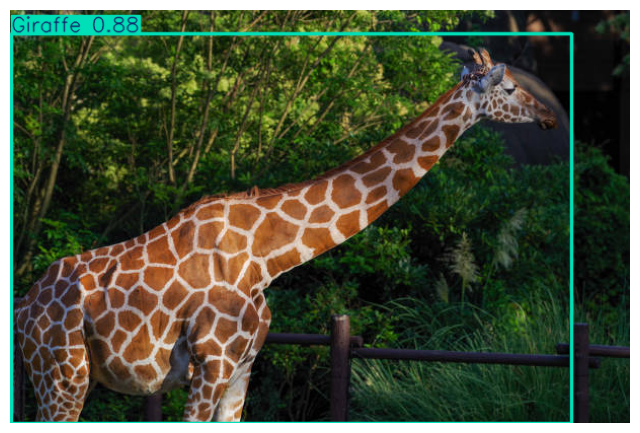

In [ ]:
#Teast on an Image

#load trained model
model = YOLO("/content/drive/MyDrive/zoo_model/zoo_dataset/runs/detect/train_zoo/weights/best.pt")
#test on an image
image_path = "/content/drive/MyDrive/zoo_model/zoo_dataset/data/Giraffe (2).jpg"

#run inference
results = model(image_path)

#Display result
for result in results:
  result_image = result.plot() #draws boxes on the image
  result_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)


  plt.figure(figsize=(8,6))
  plt.imshow(result_image)
  plt.axis("off")
  plt.show()


image 1/1 /content/drive/MyDrive/zoo_model/zoo_dataset/data/Lion (4).jpg: 448x640 1 Lion, 12.5ms
Speed: 4.1ms preprocess, 12.5ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


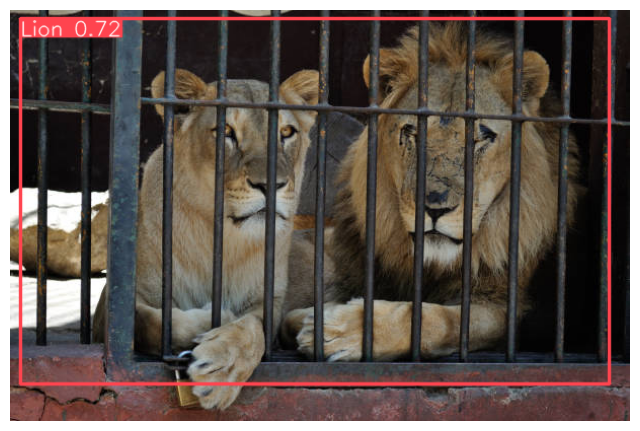

In [ ]:
#Teast on an Image

#load trained model
model = YOLO("/content/drive/MyDrive/zoo_model/zoo_dataset/runs/detect/train_zoo/weights/best.pt")
#test on an image
image_path = "/content/drive/MyDrive/zoo_model/zoo_dataset/data/Lion (4).jpg"

#run inference
results = model(image_path)

#Display result
for result in results:
  result_image = result.plot() #draws boxes on the image
  result_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)


  plt.figure(figsize=(8,6))
  plt.imshow(result_image)
  plt.axis("off")
  plt.show()


image 1/1 /content/drive/MyDrive/zoo_model/zoo_dataset/data/istockphoto-104203711-612x612.jpg: 448x640 2 Zebras, 12.9ms
Speed: 3.5ms preprocess, 12.9ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)


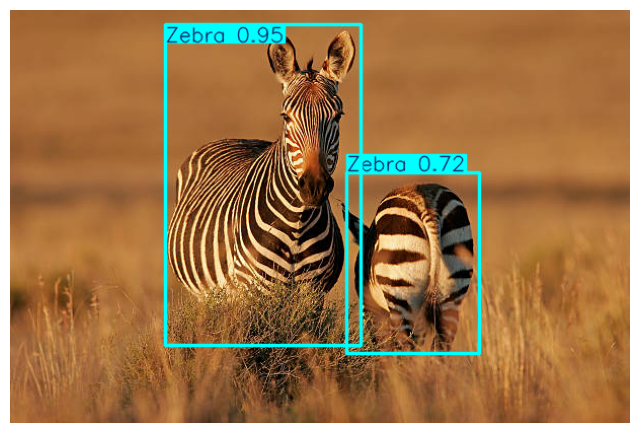

In [ ]:
#Teast on an Image

#load trained model
model = YOLO("/content/drive/MyDrive/zoo_model/zoo_dataset/runs/detect/train_zoo/weights/best.pt")
#test on an image
image_path = "/content/drive/MyDrive/zoo_model/zoo_dataset/data/istockphoto-104203711-612x612.jpg"

#run inference
results = model(image_path)

#Display result
for result in results:
  result_image = result.plot() #draws boxes on the image
  result_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)


  plt.figure(figsize=(8,6))
  plt.imshow(result_image)
  plt.axis("off")
  plt.show()


image 1/1 /content/drive/MyDrive/zoo_model/zoo_dataset/data/Zebra.jpg: 448x640 2 Zebras, 7.0ms
Speed: 2.1ms preprocess, 7.0ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


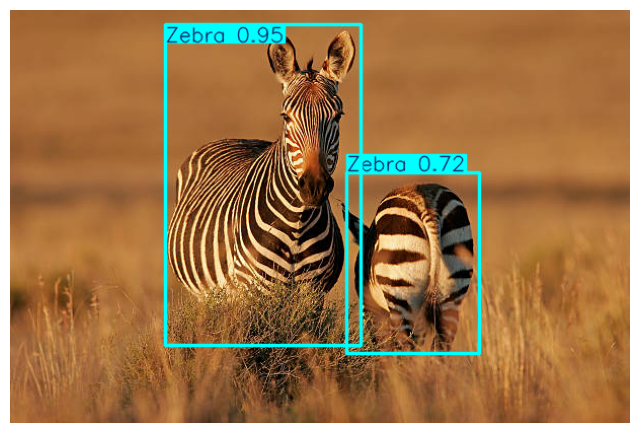

In [ ]:
#Teast on an Image

#load trained model
model = YOLO("/content/drive/MyDrive/zoo_model/zoo_dataset/runs/detect/train_zoo/weights/best.pt")
#test on an image
image_path = "/content/drive/MyDrive/zoo_model/zoo_dataset/data/Zebra.jpg"

#run inference
results = model(image_path)

#Display result
for result in results:
  result_image = result.plot() #draws boxes on the image
  result_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)


  plt.figure(figsize=(8,6))
  plt.imshow(result_image)
  plt.axis("off")
  plt.show()


image 1/1 /content/drive/MyDrive/zoo_model/zoo_dataset/data/Hippopotamus.jpg: 448x640 1 hippopotamus, 7.2ms
Speed: 2.3ms preprocess, 7.2ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


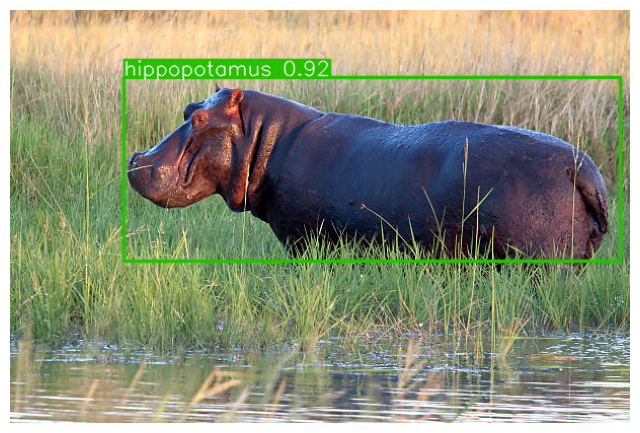

In [ ]:
#Teast on an Image

#load trained model
model = YOLO("/content/drive/MyDrive/zoo_model/zoo_dataset/runs/detect/train_zoo/weights/best.pt")
#test on an image
image_path = "/content/drive/MyDrive/zoo_model/zoo_dataset/data/Hippopotamus.jpg"

#run inference
results = model(image_path)

#Display result
for result in results:
  result_image = result.plot() #draws boxes on the image
  result_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)


  plt.figure(figsize=(8,6))
  plt.imshow(result_image)
  plt.axis("off")
  plt.show()


image 1/1 /content/drive/MyDrive/zoo_model/zoo_dataset/data/Rhino.jpg: 448x640 2 Rhinos, 11.4ms
Speed: 9.0ms preprocess, 11.4ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


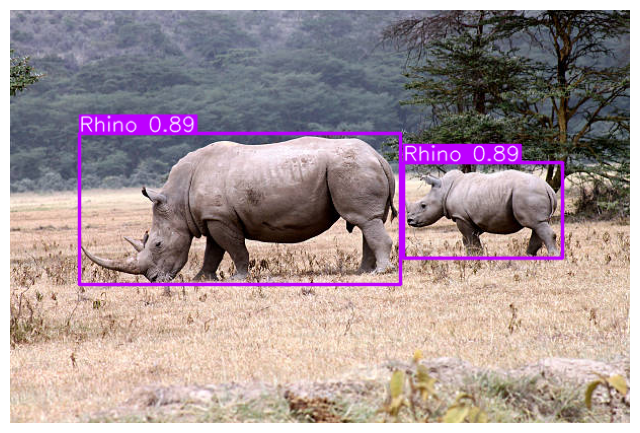

In [ ]:
#Teast on an Image

#load trained model
model = YOLO("/content/drive/MyDrive/zoo_model/zoo_dataset/runs/detect/train_zoo/weights/best.pt")
#test on an image
image_path = "/content/drive/MyDrive/zoo_model/zoo_dataset/data/Rhino.jpg"

#run inference
results = model(image_path)

#Display result
for result in results:
  result_image = result.plot() #draws boxes on the image
  result_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)


  plt.figure(figsize=(8,6))
  plt.imshow(result_image)
  plt.axis("off")
  plt.show()


image 1/1 /content/drive/MyDrive/zoo_model/zoo_dataset/data/Warthog.jpg: 448x640 3 Warthogs, 7.9ms
Speed: 3.1ms preprocess, 7.9ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


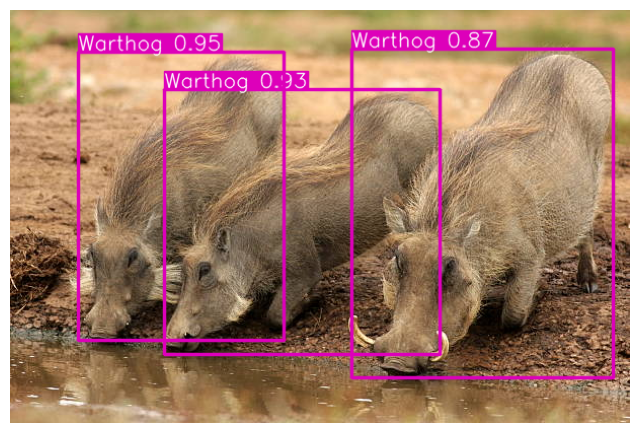

In [ ]:
#Teast on an Image

#load trained model
model = YOLO("/content/drive/MyDrive/zoo_model/zoo_dataset/runs/detect/train_zoo/weights/best.pt")
#test on an image
image_path = "/content/drive/MyDrive/zoo_model/zoo_dataset/data/Warthog.jpg"

#run inference
results = model(image_path)

#Display result
for result in results:
  result_image = result.plot() #draws boxes on the image
  result_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)


  plt.figure(figsize=(8,6))
  plt.imshow(result_image)
  plt.axis("off")
  plt.show()


image 1/1 /content/drive/MyDrive/zoo_model/zoo_dataset/data/Hyena.jpg: 416x640 2 Hyenas, 7.0ms
Speed: 2.6ms preprocess, 7.0ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)


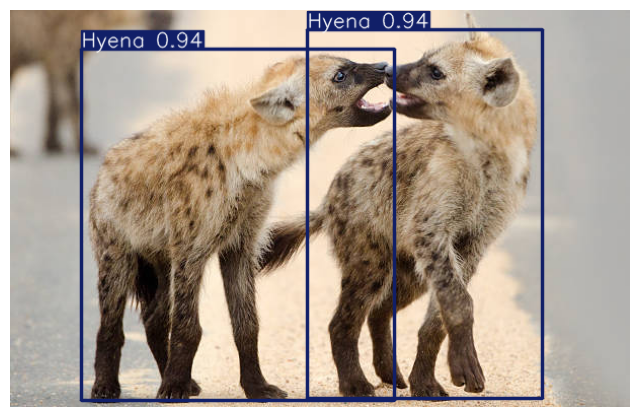

In [ ]:
#Teast on an Image

#load trained model
model = YOLO("/content/drive/MyDrive/zoo_model/zoo_dataset/runs/detect/train_zoo/weights/best.pt")
#test on an image
image_path = "/content/drive/MyDrive/zoo_model/zoo_dataset/data/Hyena.jpg"

#run inference
results = model(image_path)

#Display result
for result in results:
  result_image = result.plot() #draws boxes on the image
  result_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)


  plt.figure(figsize=(8,6))
  plt.imshow(result_image)
  plt.axis("off")
  plt.show()


image 1/1 /content/drive/MyDrive/zoo_model/zoo_dataset/data/Tiger.jpg: 448x640 1 Tiger, 7.2ms
Speed: 3.1ms preprocess, 7.2ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


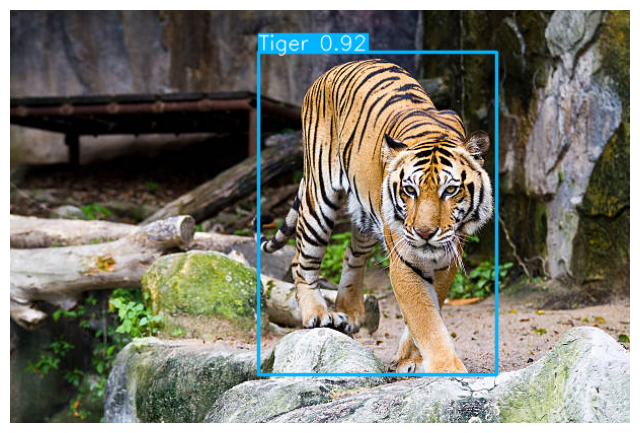

In [ ]:
#Teast on an Image

#load trained model
model = YOLO("/content/drive/MyDrive/zoo_model/zoo_dataset/runs/detect/train_zoo/weights/best.pt")
#test on an image
image_path = "/content/drive/MyDrive/zoo_model/zoo_dataset/data/Tiger.jpg"

#run inference
results = model(image_path)

#Display result
for result in results:
  result_image = result.plot() #draws boxes on the image
  result_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)


  plt.figure(figsize=(8,6))
  plt.imshow(result_image)
  plt.axis("off")
  plt.show()


image 1/1 /content/drive/MyDrive/zoo_model/zoo_dataset/data/Elephant.jpg: 480x640 1 Elephant, 41.4ms
Speed: 4.1ms preprocess, 41.4ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


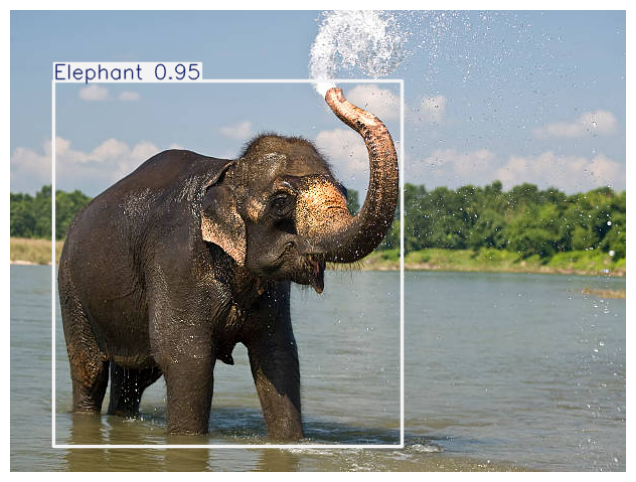

In [ ]:
#Teast on an Image

#load trained model
model = YOLO("/content/drive/MyDrive/zoo_model/zoo_dataset/runs/detect/train_zoo/weights/best.pt")
#test on an image
image_path = "/content/drive/MyDrive/zoo_model/zoo_dataset/data/Elephant.jpg"

#run inference
results = model(image_path)

#Display result
for result in results:
  result_image = result.plot() #draws boxes on the image
  result_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)


  plt.figure(figsize=(8,6))
  plt.imshow(result_image)
  plt.axis("off")
  plt.show()

In [ ]:
#Test on a Video
video_path = "/content/drive/MyDrive/zoo_model/zoo_dataset/data/twiga.mp4"

#Run inference on video and save output
results=model.predict(video_path, save=True)
#Output video will be in run/detect/predict



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/328) /content/drive/MyDrive/zoo_model/zoo_dataset/data/twiga.mp4: 384x640 4 Giraffes, 9.6ms
video 1/1 (frame 2/328) /content/drive/MyDrive/zoo_model/zoo_dataset/data/twiga.mp4: 384x640 4 Giraffes, 9.1ms
video 1/1 (frame 3/328) /content/drive/MyDrive/zoo_model/zoo_dataset/data/twiga.mp4: 384x640 4 Giraffes, 7.5ms
video 1/1 (frame 4/328) /content/drive/MyDrive/zoo_model/zoo_dataset/data/twiga.mp4: 384x640 4 Giraffes, 8.2ms
video 1/1 (f

In [ ]:
from google.colab import files
import glob

# Find the video file
video_path = glob.glob("/content/runs/detect/predict/twiga.avi")[0]

# Download the video
files.download(video_path)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:


import cv2
import numpy as np
from ultralytics import YOLO
import firebase_admin
from firebase_admin import credentials, messaging
from google.colab.patches import cv2_imshow  # For displaying images in Colab

# Load the trained YOLOv8 model
model = YOLO("/content/drive/MyDrive/zoo_model/zoo_dataset/runs/detect/train_zoo/weights/best.pt")  # Ensure this path is correct

# Open the video feed (0 for webcam, or replace with video file path)
video_path = "/content/drive/MyDrive/zoo_model/zoo_dataset/data/kasongo.mp4"
cap = cv2.VideoCapture(video_path)

# Check if the video opened successfully
if not cap.isOpened():
    print("Error: Cannot open video file or camera.")
    exit()

# Define the enclosure boundary as a polygon (adjust coordinates as needed)
ENCLOSURE_BOUNDARY = [(100, 100), (500, 100), (500, 400), (100, 400)]

def is_inside_boundary(point, boundary):
    """Check if a point (x, y) is inside the enclosure boundary"""
    poly = np.array(boundary, np.int32)
    poly = poly.reshape((-1, 1, 2))
    return cv2.pointPolygonTest(poly, point, False) >= 0

# Initialize Firebase Admin SDK if not already initialized
if not firebase_admin._apps:
    cred = credentials.Certificate("/content/drive/MyDrive/zoo_model/zoo_dataset/animal-detection-system-a7bbc-firebase-adminsdk-fbsvc-f0b4fb3231.json")  # Ensure correct path
    firebase_admin.initialize_app(cred)

def send_alert(animal_name):
    """Send an alert to zoo staff via Firebase Cloud Messaging"""
    message = messaging.Message(
        notification=messaging.Notification(
            title="⚠️ Animal Escape Alert!",
            body=f"{animal_name} has left its enclosure!",
        ),
        topic="zoo_alerts",
    )
    response = messaging.send(message)
    print(f"📢 Alert sent: {response}")

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Run YOLO detection
    results = model(frame)

    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()  # Bounding box coordinates
            class_id = int(box.cls[0].cpu().numpy())  # Class ID
            confidence = float(box.conf[0].cpu().numpy())  # Confidence score
            animal_name = model.names[class_id]  # Get detected animal name

            # Get the center of the detected animal
            animal_center = ((x1 + x2) / 2, (y1 + y2) / 2)

            # Check if the animal is inside the enclosure
            if not is_inside_boundary(animal_center, ENCLOSURE_BOUNDARY):
                print(f"⚠️ ALERT! {animal_name} has left the enclosure!")
                send_alert(animal_name)

    # Display the frame in Colab
    cv2_imshow(frame)

cap.release()
cv2.destroyAllWindows()


In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="DhmDdqpEs7ma7UmfyS6m")
project = rf.workspace("zoo-ctwym").project("animal-behavior-y82su")
version = project.version(7)
dataset = version.download("folder")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Animal-Behavior-7 in folder:: 100%|██████████| 2617/2617 [00:01<00:00, 2614.50it/s]


In [4]:
# Path to the dataset
dataset_path = "/content/Animal-Behavior-7"

# Dataset directories (ensure these folders exist and are organized correctly with subfolders for each class)
train_dir = os.path.join(dataset_path, "train")
val_dir = os.path.join(dataset_path, "valid")  # Some datasets may use 'val'
test_dir = os.path.join(dataset_path, "test")

# Print directory structure to verify
print("Training Directory:", train_dir)
print("Validation Directory:", val_dir)
print("Testing Directory:", test_dir)

# Load the YOLOv8 model (classification version)
model = YOLO("yolov8n-cls.pt")

# Check if GPU is available and set device accordingly
device = "cuda" if torch.cuda.is_available() else "cpu"  # Use GPU if available, otherwise fallback to CPU

# Train the model
model.train(
    data=dataset_path,  # Path to your dataset
    epochs=50,           # Training epochs
    imgsz=224,           # Image size
    batch=16,            # Batch size
    device=device       # Use GPU if available, otherwise CPU
)

Training Directory: /content/Animal-Behavior-7/train
Validation Directory: /content/Animal-Behavior-7/valid
Testing Directory: /content/Animal-Behavior-7/test


100%|██████████| 5.31M/5.31M [00:00<00:00, 60.1MB/s]


Ultralytics 8.3.95 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/Animal-Behavior-7, epochs=50, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show

100%|██████████| 5.35M/5.35M [00:00<00:00, 172MB/s]


AMP: checks passed ✅


train: Scanning /content/Animal-Behavior-7/train... 1771 images, 0 corrupt: 100%|██████████| 1771/1771 [00:00<00:00, 5803.72it/s]

train: New cache created: /content/Animal-Behavior-7/train.cache



val: Scanning /content/Animal-Behavior-7/test... 254 images, 0 corrupt: 100%|██████████| 254/254 [00:00<00:00, 2360.72it/s]

val: New cache created: /content/Animal-Behavior-7/test.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000278, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 50 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/50     0.271G      3.442         16        224:   7%|▋         | 8/111 [00:01<00:14,  7.01it/s]

       1/50     0.271G      3.458         16        224:  11%|█         | 12/111 [00:01<00:14,  6.61it/s]
100%|██████████| 755k/755k [00:00<00:00, 36.5MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  7.32it/s]

                   all    0.00394     0.0866



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  4.58it/s]

                   all    0.00394      0.118



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  6.13it/s]

                   all    0.00394      0.146



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  6.47it/s]

                   all    0.00394      0.177



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  4.94it/s]

                   all     0.0118      0.189



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  4.13it/s]

                   all     0.0118      0.173



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  6.56it/s]

                   all    0.00394      0.161



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  5.40it/s]

                   all    0.00787      0.165



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  7.21it/s]

                   all          0      0.138



      Epoch    GPU_mem       loss  Instances       Size


      10/50      0.35G     0.6108         11        224: 100%|██████████| 111/111 [00:16<00:00,  6.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  5.52it/s]

                   all    0.00787      0.157



      Epoch    GPU_mem       loss  Instances       Size


      11/50     0.357G     0.5687         11        224: 100%|██████████| 111/111 [00:18<00:00,  6.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  7.55it/s]

                   all     0.0118      0.154



      Epoch    GPU_mem       loss  Instances       Size


      12/50     0.365G     0.5246         11        224: 100%|██████████| 111/111 [00:16<00:00,  6.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  6.71it/s]

                   all    0.00787      0.146



      Epoch    GPU_mem       loss  Instances       Size


      13/50     0.375G     0.4981         11        224: 100%|██████████| 111/111 [00:16<00:00,  6.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  7.37it/s]

                   all    0.00787      0.138



      Epoch    GPU_mem       loss  Instances       Size


      14/50     0.383G     0.4787         11        224: 100%|██████████| 111/111 [00:18<00:00,  6.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  6.77it/s]

                   all    0.00787      0.138



      Epoch    GPU_mem       loss  Instances       Size


      15/50     0.391G     0.4528         11        224: 100%|██████████| 111/111 [00:16<00:00,  6.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  7.48it/s]

                   all    0.00394       0.15



      Epoch    GPU_mem       loss  Instances       Size


      16/50     0.398G     0.4307         11        224: 100%|██████████| 111/111 [00:16<00:00,  6.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  6.21it/s]

                   all    0.00394       0.15



      Epoch    GPU_mem       loss  Instances       Size


      17/50     0.408G     0.3779         11        224: 100%|██████████| 111/111 [00:20<00:00,  5.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  7.48it/s]

                   all    0.00787      0.142



      Epoch    GPU_mem       loss  Instances       Size


      18/50     0.416G     0.3964         11        224: 100%|██████████| 111/111 [00:16<00:00,  6.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  7.05it/s]

                   all    0.00787      0.146



      Epoch    GPU_mem       loss  Instances       Size


      19/50     0.424G     0.3741         11        224: 100%|██████████| 111/111 [00:16<00:00,  6.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  7.34it/s]

                   all    0.00787       0.15



      Epoch    GPU_mem       loss  Instances       Size


      20/50     0.434G     0.3665         11        224: 100%|██████████| 111/111 [00:17<00:00,  6.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  6.49it/s]

                   all     0.0118      0.142



      Epoch    GPU_mem       loss  Instances       Size


      21/50     0.441G     0.3337         11        224: 100%|██████████| 111/111 [00:16<00:00,  6.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  6.64it/s]

                   all    0.00394      0.138



      Epoch    GPU_mem       loss  Instances       Size


      22/50     0.449G     0.3619         11        224: 100%|██████████| 111/111 [00:16<00:00,  6.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  7.64it/s]

                   all    0.00787      0.142



      Epoch    GPU_mem       loss  Instances       Size


      23/50     0.459G     0.3305         11        224: 100%|██████████| 111/111 [00:17<00:00,  6.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  4.73it/s]

                   all    0.00787      0.138



      Epoch    GPU_mem       loss  Instances       Size


      24/50     0.467G     0.3224         11        224: 100%|██████████| 111/111 [00:16<00:00,  6.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  7.18it/s]

                   all     0.0118       0.15



      Epoch    GPU_mem       loss  Instances       Size


      25/50     0.475G     0.3079         11        224: 100%|██████████| 111/111 [00:16<00:00,  6.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  7.41it/s]

                   all     0.0118      0.122



      Epoch    GPU_mem       loss  Instances       Size


      26/50     0.482G     0.3155         11        224: 100%|██████████| 111/111 [00:16<00:00,  6.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:02<00:00,  3.89it/s]

                   all    0.00787      0.142



      Epoch    GPU_mem       loss  Instances       Size


      27/50     0.492G     0.3043         11        224: 100%|██████████| 111/111 [00:16<00:00,  6.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  7.14it/s]

                   all    0.00394      0.126



      Epoch    GPU_mem       loss  Instances       Size


      28/50       0.5G     0.3084         11        224: 100%|██████████| 111/111 [00:18<00:00,  6.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  7.56it/s]

                   all    0.00787       0.13



      Epoch    GPU_mem       loss  Instances       Size


      29/50     0.508G     0.3013         11        224: 100%|██████████| 111/111 [00:17<00:00,  6.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  4.25it/s]

                   all    0.00787      0.134



      Epoch    GPU_mem       loss  Instances       Size


      30/50     0.516G     0.2702         11        224: 100%|██████████| 111/111 [00:16<00:00,  6.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  7.16it/s]

                   all    0.00787      0.122



      Epoch    GPU_mem       loss  Instances       Size


      31/50     0.525G     0.2699         11        224: 100%|██████████| 111/111 [00:16<00:00,  6.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  7.55it/s]

                   all    0.00787      0.122



      Epoch    GPU_mem       loss  Instances       Size


      32/50     0.533G     0.2655         11        224: 100%|██████████| 111/111 [00:16<00:00,  6.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  5.61it/s]

                   all    0.00787       0.13



      Epoch    GPU_mem       loss  Instances       Size


      33/50     0.541G     0.2541         11        224: 100%|██████████| 111/111 [00:17<00:00,  6.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  7.10it/s]

                   all     0.0118      0.138



      Epoch    GPU_mem       loss  Instances       Size


      34/50     0.551G     0.2619         11        224: 100%|██████████| 111/111 [00:16<00:00,  6.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  6.97it/s]

                   all     0.0118      0.142



      Epoch    GPU_mem       loss  Instances       Size


      35/50     0.559G     0.2584         11        224: 100%|██████████| 111/111 [00:16<00:00,  6.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  6.56it/s]

                   all    0.00787      0.142



      Epoch    GPU_mem       loss  Instances       Size


      36/50     0.566G     0.2334         11        224: 100%|██████████| 111/111 [00:18<00:00,  6.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  7.63it/s]

                   all     0.0118       0.13



      Epoch    GPU_mem       loss  Instances       Size


      37/50     0.574G     0.2145         11        224: 100%|██████████| 111/111 [00:16<00:00,  6.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  7.26it/s]

                   all     0.0118      0.134



      Epoch    GPU_mem       loss  Instances       Size


      38/50     0.584G     0.2324         11        224: 100%|██████████| 111/111 [00:17<00:00,  6.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  4.23it/s]

                   all     0.0118      0.118



      Epoch    GPU_mem       loss  Instances       Size


      39/50     0.592G      0.241         11        224: 100%|██████████| 111/111 [00:17<00:00,  6.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  7.88it/s]

                   all    0.00787      0.122



      Epoch    GPU_mem       loss  Instances       Size


      40/50       0.6G     0.2358         11        224: 100%|██████████| 111/111 [00:16<00:00,  6.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  7.09it/s]

                   all    0.00787      0.106



      Epoch    GPU_mem       loss  Instances       Size


      41/50     0.609G     0.2393         11        224: 100%|██████████| 111/111 [00:16<00:00,  6.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  6.86it/s]

                   all    0.00787      0.114



      Epoch    GPU_mem       loss  Instances       Size


      42/50     0.617G     0.2192         11        224: 100%|██████████| 111/111 [00:17<00:00,  6.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  5.57it/s]

                   all    0.00787      0.118

      Epoch    GPU_mem       loss  Instances       Size



      43/50     0.625G      0.232         11        224: 100%|██████████| 111/111 [00:16<00:00,  6.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  7.67it/s]

                   all    0.00787      0.126



      Epoch    GPU_mem       loss  Instances       Size


      44/50     0.633G     0.2195         11        224: 100%|██████████| 111/111 [00:16<00:00,  6.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  6.73it/s]

                   all    0.00787      0.118



      Epoch    GPU_mem       loss  Instances       Size


      45/50     0.643G     0.2279         11        224: 100%|██████████| 111/111 [00:16<00:00,  6.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  4.48it/s]

                   all    0.00787      0.122



      Epoch    GPU_mem       loss  Instances       Size


      46/50      0.65G     0.1998         11        224: 100%|██████████| 111/111 [00:17<00:00,  6.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  7.37it/s]

                   all    0.00787      0.122



      Epoch    GPU_mem       loss  Instances       Size


      47/50     0.658G      0.223         11        224: 100%|██████████| 111/111 [00:16<00:00,  6.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  7.95it/s]

                   all    0.00787      0.114



      Epoch    GPU_mem       loss  Instances       Size


      48/50     0.666G     0.2013         11        224: 100%|██████████| 111/111 [00:16<00:00,  6.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  7.20it/s]

                   all    0.00787      0.114



      Epoch    GPU_mem       loss  Instances       Size


      49/50     0.676G     0.2045         11        224: 100%|██████████| 111/111 [00:19<00:00,  5.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  7.14it/s]

                   all    0.00787      0.102



      Epoch    GPU_mem       loss  Instances       Size


      50/50     0.684G     0.2295         11        224: 100%|██████████| 111/111 [00:16<00:00,  6.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  6.93it/s]

                   all    0.00787      0.106



50 epochs completed in 0.263 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.0MB

Validating runs/classify/train/weights/best.pt...
Ultralytics 8.3.95 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-cls summary (fused): 30 layers, 1,475,872 parameters, 0 gradients, 3.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/Animal-Behavior-7/train... found 1771 images in 32 classes ✅ 
val: /content/Animal-Behavior-7/test... found 254 images in 21 classes: ERROR ❌️ requires 32 classes, not 21
test: /content/Animal-Behavior-7/test... found 254 images in 21 classes: ERROR ❌️ requires 32 classes, not 21


               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:01<00:00,  7.28it/s]


                   all     0.0118      0.189
Speed: 0.1ms preprocess, 0.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b0bf6c25b50>
curves: []
curves_results: []
fitness: 0.1003937004134059
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.011811023578047752, 'metrics/accuracy_top5': 0.18897637724876404, 'fitness': 0.1003937004134059}
save_dir: PosixPath('runs/classify/train')
speed: {'preprocess': 0.11154729921460291, 'inference': 0.4404840393688817, 'loss': 0.0004506811021244397, 'postprocess': 0.0010432716579977185}
task: 'classify'
top1: 0.011811023578047752
top5: 0.18897637724876404


image 1/1 /content/drive/MyDrive/zoo_model/Animal-Behavior-7/data/1.jpg: 224x224 Walking 0.31, Resting 0.29, Eating Visitor Close 0.10, Eating Walking 0.09, Playing Walking 0.07, 3.3ms
Speed: 15.6ms preprocess, 3.3ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


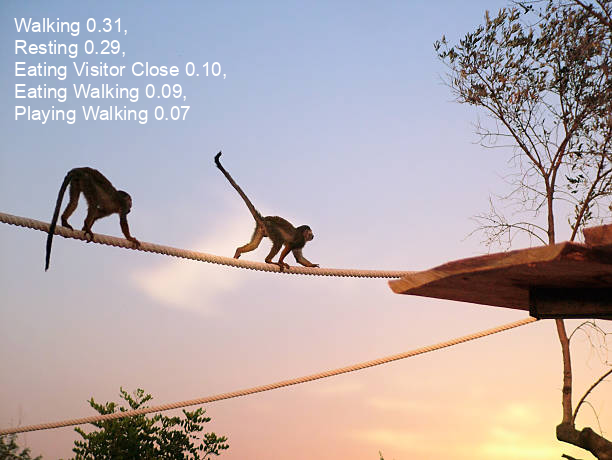

      name  class  confidence
0  Walking     31     0.30787


In [5]:
from ultralytics import YOLO

# Load the trained model
model = YOLO('/content/drive/MyDrive/zoo_model/Animal-Behavior-7/runs/classify/train/weights/best.pt')  # Replace with the path to your trained model

# Run inference on a single test image
results = model.predict('/content/drive/MyDrive/zoo_model/Animal-Behavior-7/data/1.jpg')  # Replace with the path to your single image

# Visualize results (predictions on the image)
results[0].show()  # Access the first result in the list

# Save results (optional)
results[0].save()  # Saves the output to 'runs/detect/predict'

# Print predictions (optional)
df = results[0].to_df()  # Convert results to a pandas DataFrame
print(df)  # Display the predictions DataFrame



image 1/1 /content/drive/MyDrive/zoo_model/Animal-Behavior-7/data/2.jpg: 224x224 Resting 0.39, Walking 0.16, Eating Resting 0.08, Eating Visitor Close 0.08, Playing Walking 0.06, 3.3ms
Speed: 4.9ms preprocess, 3.3ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


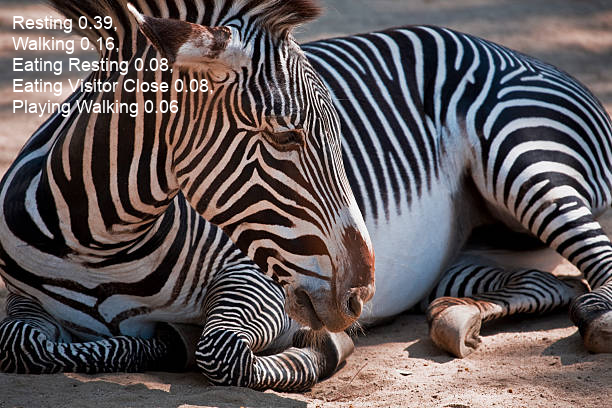

      name  class  confidence
0  Resting     21     0.39115


In [6]:
from ultralytics import YOLO

# Load the trained model
model = YOLO('/content/drive/MyDrive/zoo_model/Animal-Behavior-7/runs/classify/train/weights/best.pt')  # Replace with the path to your trained model

# Run inference on a single test image
results = model.predict('/content/drive/MyDrive/zoo_model/Animal-Behavior-7/data/2.jpg')  # Replace with the path to your single image

# Visualize results (predictions on the image)
results[0].show()  # Access the first result in the list

# Save results (optional)
results[0].save()  # Saves the output to 'runs/detect/predict'

# Print predictions (optional)
df = results[0].to_df()  # Convert results to a pandas DataFrame
print(df)  # Display the predictions DataFrame



image 1/1 /content/drive/MyDrive/zoo_model/Animal-Behavior-7/data/3.jpg: 224x224 Walking 0.41, Eating Walking 0.40, Eating 0.08, Playing Walking 0.06, Resting Walking 0.01, 3.5ms
Speed: 4.7ms preprocess, 3.5ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)


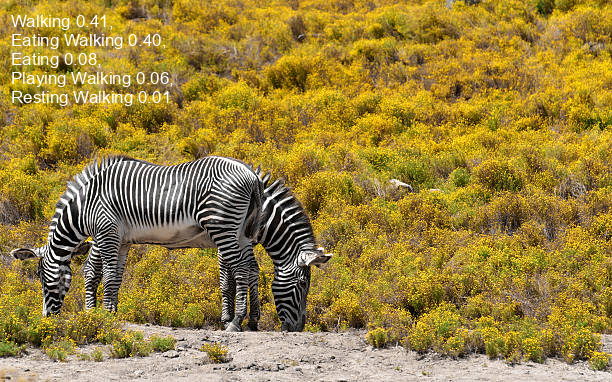

      name  class  confidence
0  Walking     31     0.41192


In [7]:
from ultralytics import YOLO

# Load the trained model
model = YOLO('/content/drive/MyDrive/zoo_model/Animal-Behavior-7/runs/classify/train/weights/best.pt')  # Replace with the path to your trained model

# Run inference on a single test image
results = model.predict('/content/drive/MyDrive/zoo_model/Animal-Behavior-7/data/3.jpg')  # Replace with the path to your single image

# Visualize results (predictions on the image)
results[0].show()  # Access the first result in the list

# Save results (optional)
results[0].save()  # Saves the output to 'runs/detect/predict'

# Print predictions (optional)
df = results[0].to_df()  # Convert results to a pandas DataFrame
print(df)  # Display the predictions DataFrame



image 1/1 /content/drive/MyDrive/zoo_model/Animal-Behavior-7/data/6.jpeg: 224x224 Eating Resting 0.44, Resting 0.13, Eating 0.09, Walking 0.05, Playing Walking 0.04, 3.7ms
Speed: 3.5ms preprocess, 3.7ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


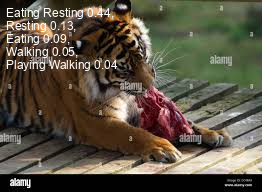

             name  class  confidence
0  Eating Resting     11     0.43694


In [8]:
from ultralytics import YOLO

# Load the trained model
model = YOLO('/content/drive/MyDrive/zoo_model/Animal-Behavior-7/runs/classify/train/weights/best.pt')  # Replace with the path to your trained model

# Run inference on a single test image
results = model.predict('/content/drive/MyDrive/zoo_model/Animal-Behavior-7/data/6.jpeg')  # Replace with the path to your single image

# Visualize results (predictions on the image)
results[0].show()  # Access the first result in the list

# Save results (optional)
results[0].save()  # Saves the output to 'runs/detect/predict'

# Print predictions (optional)
df = results[0].to_df()  # Convert results to a pandas DataFrame
print(df)  # Display the predictions DataFrame



image 1/1 /content/drive/MyDrive/zoo_model/Animal-Behavior-7/data/7.jpeg: 224x224 Walking 0.76, Eating Walking 0.13, Eating 0.03, Playing Walking 0.02, Resting Walking 0.02, 3.3ms
Speed: 3.9ms preprocess, 3.3ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)


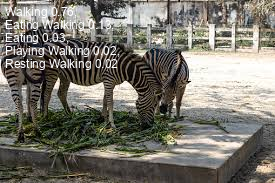

      name  class  confidence
0  Walking     31     0.75731


In [9]:
from ultralytics import YOLO

# Load the trained model
model = YOLO('/content/drive/MyDrive/zoo_model/Animal-Behavior-7/runs/classify/train/weights/best.pt')  # Replace with the path to your trained model

# Run inference on a single test image
results = model.predict('/content/drive/MyDrive/zoo_model/Animal-Behavior-7/data/7.jpeg')  # Replace with the path to your single image

# Visualize results (predictions on the image)
results[0].show()  # Access the first result in the list

# Save results (optional)
results[0].save()  # Saves the output to 'runs/detect/predict'

# Print predictions (optional)
df = results[0].to_df()  # Convert results to a pandas DataFrame
print(df)  # Display the predictions DataFrame



image 1/1 /content/drive/MyDrive/zoo_model/Animal-Behavior-7/data/download.jpeg: 224x224 Eating 0.51, Walking 0.21, Playing Walking 0.15, Eating Resting 0.04, Playing 0.04, 3.9ms
Speed: 3.7ms preprocess, 3.9ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


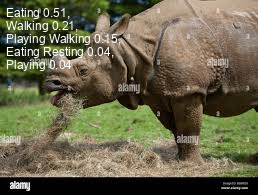

     name  class  confidence
0  Eating      7     0.51455


In [11]:
from ultralytics import YOLO

# Load the trained model
model = YOLO('/content/drive/MyDrive/zoo_model/Animal-Behavior-7/runs/classify/train/weights/best.pt')  # Replace with the path to your trained model

# Run inference on a single test image
results = model.predict('/content/drive/MyDrive/zoo_model/Animal-Behavior-7/data/download.jpeg')  # Replace with the path to your single image

# Visualize results (predictions on the image)
results[0].show()  # Access the first result in the list

# Save results (optional)
results[0].save()  # Saves the output to 'runs/detect/predict'

# Print predictions (optional)
df = results[0].to_df()  # Convert results to a pandas DataFrame
print(df)  # Display the predictions DataFrame


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from ultralytics import YOLO

# Load your models
detection_model = YOLO('/content/drive/MyDrive/zoo_model/zoo_dataset/runs/detect/train_zoo/weights/best.pt')  # Replace with the path to your detection model
classification_model = YOLO('/content/drive/MyDrive/zoo_model/animal-calssification-6/runs/classify/train/weights/best.pt')  # Replace with the path to your classification model

# Load the test image
image_path = '/content/istockphoto-1754825244-612x612.jpg'  # Replace with the path to your test image
img = cv2.imread(image_path)

# Step 1: Run object detection to get bounding boxes
results_detection = detection_model.predict(image_path)

# Step 2: Iterate through the detection results and crop the detected objects
detected_objects = []

for result in results_detection:
    for box in result.boxes:
        # Get the bounding box coordinates and move to CPU before converting to numpy
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()

        # Crop the object from the original image
        cropped_object = img[int(y1):int(y2), int(x1):int(x2)]

        # Save the cropped object for classification
        detected_objects.append(cropped_object)

# Step 3: Run classification on the cropped objects
classified_objects = []
for obj in detected_objects:
    # Classify the cropped object
    results_classification = classification_model.predict(obj)

    # Inspect the top predictions to ensure we're getting the correct label
    top_prediction = results_classification[0].names[0]
    confidence = results_classification[0].probs.top1conf.item()  # Use .item() directly for 0-dimensional tensor

    print(f"Classification top prediction: {top_prediction} with confidence: {confidence:.2f}")

    # Append top prediction (change as needed based on your model's output)
    classified_objects.append((top_prediction, confidence))

# Step 4: Display results and print animal names and behavior
for i, (animal_name, confidence) in enumerate(classified_objects):
    if confidence > 0.5:  # Only show results with confidence > 50%
        print(f"Detected Object {i+1}: {animal_name} with confidence {confidence:.2f}")
        # Display the cropped object image that was classified
        cv2_imshow(detected_objects[i])  # This will display the cropped image



image 1/1 /content/istockphoto-1754825244-612x612.jpg: 448x640 1 Monkey, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)

0: 224x224 Animal_aggressive Restricted_zone_breach Visitor_restricted Visitor_teasing 0.05, Restricted_zone_breach Visitor_restricted Visitor_teasing 0.04, Animal_normal Enclosure_secure 0.04, Animal_aggressive Enclosure_secure 0.03, Animal_aggressive Animal_escape_attempt Animal_outside_enclosure Enclosure_open 0.03, 4.0ms
Speed: 4.4ms preprocess, 4.0ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Classification top prediction: Animal_aggressive with confidence: 0.05
